In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('2017-1.xls')

df

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [39]:
df.head(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [40]:
df.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [41]:
df.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [42]:
df.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

# Clustering Tasks (Mandatory)

## Cluster by Economic and Social Factors (15 Marks)

- ### Can we cluster countries into distinct groups based on their economic and social factors?

First, we need to decide the columns to cluster for. Printing out the columns in a list, we get:

In [43]:
for d in df.columns:
    print(d)

Country
Happiness.Rank
Happiness.Score
Whisker.high
Whisker.low
Economy..GDP.per.Capita.
Family
Health..Life.Expectancy.
Freedom
Generosity
Trust..Government.Corruption.
Dystopia.Residual


From this, we can see that socio-economic factors are:

- Economy..GDP.per.Capita.
- Family
- Health..Life.Expectancy.
- Freedom
- Generosity
- Trust..Government.Corruption.
- Dystopia.Residual

We can create an array for these and then with the help of a KMeans clustering, cluster them together.

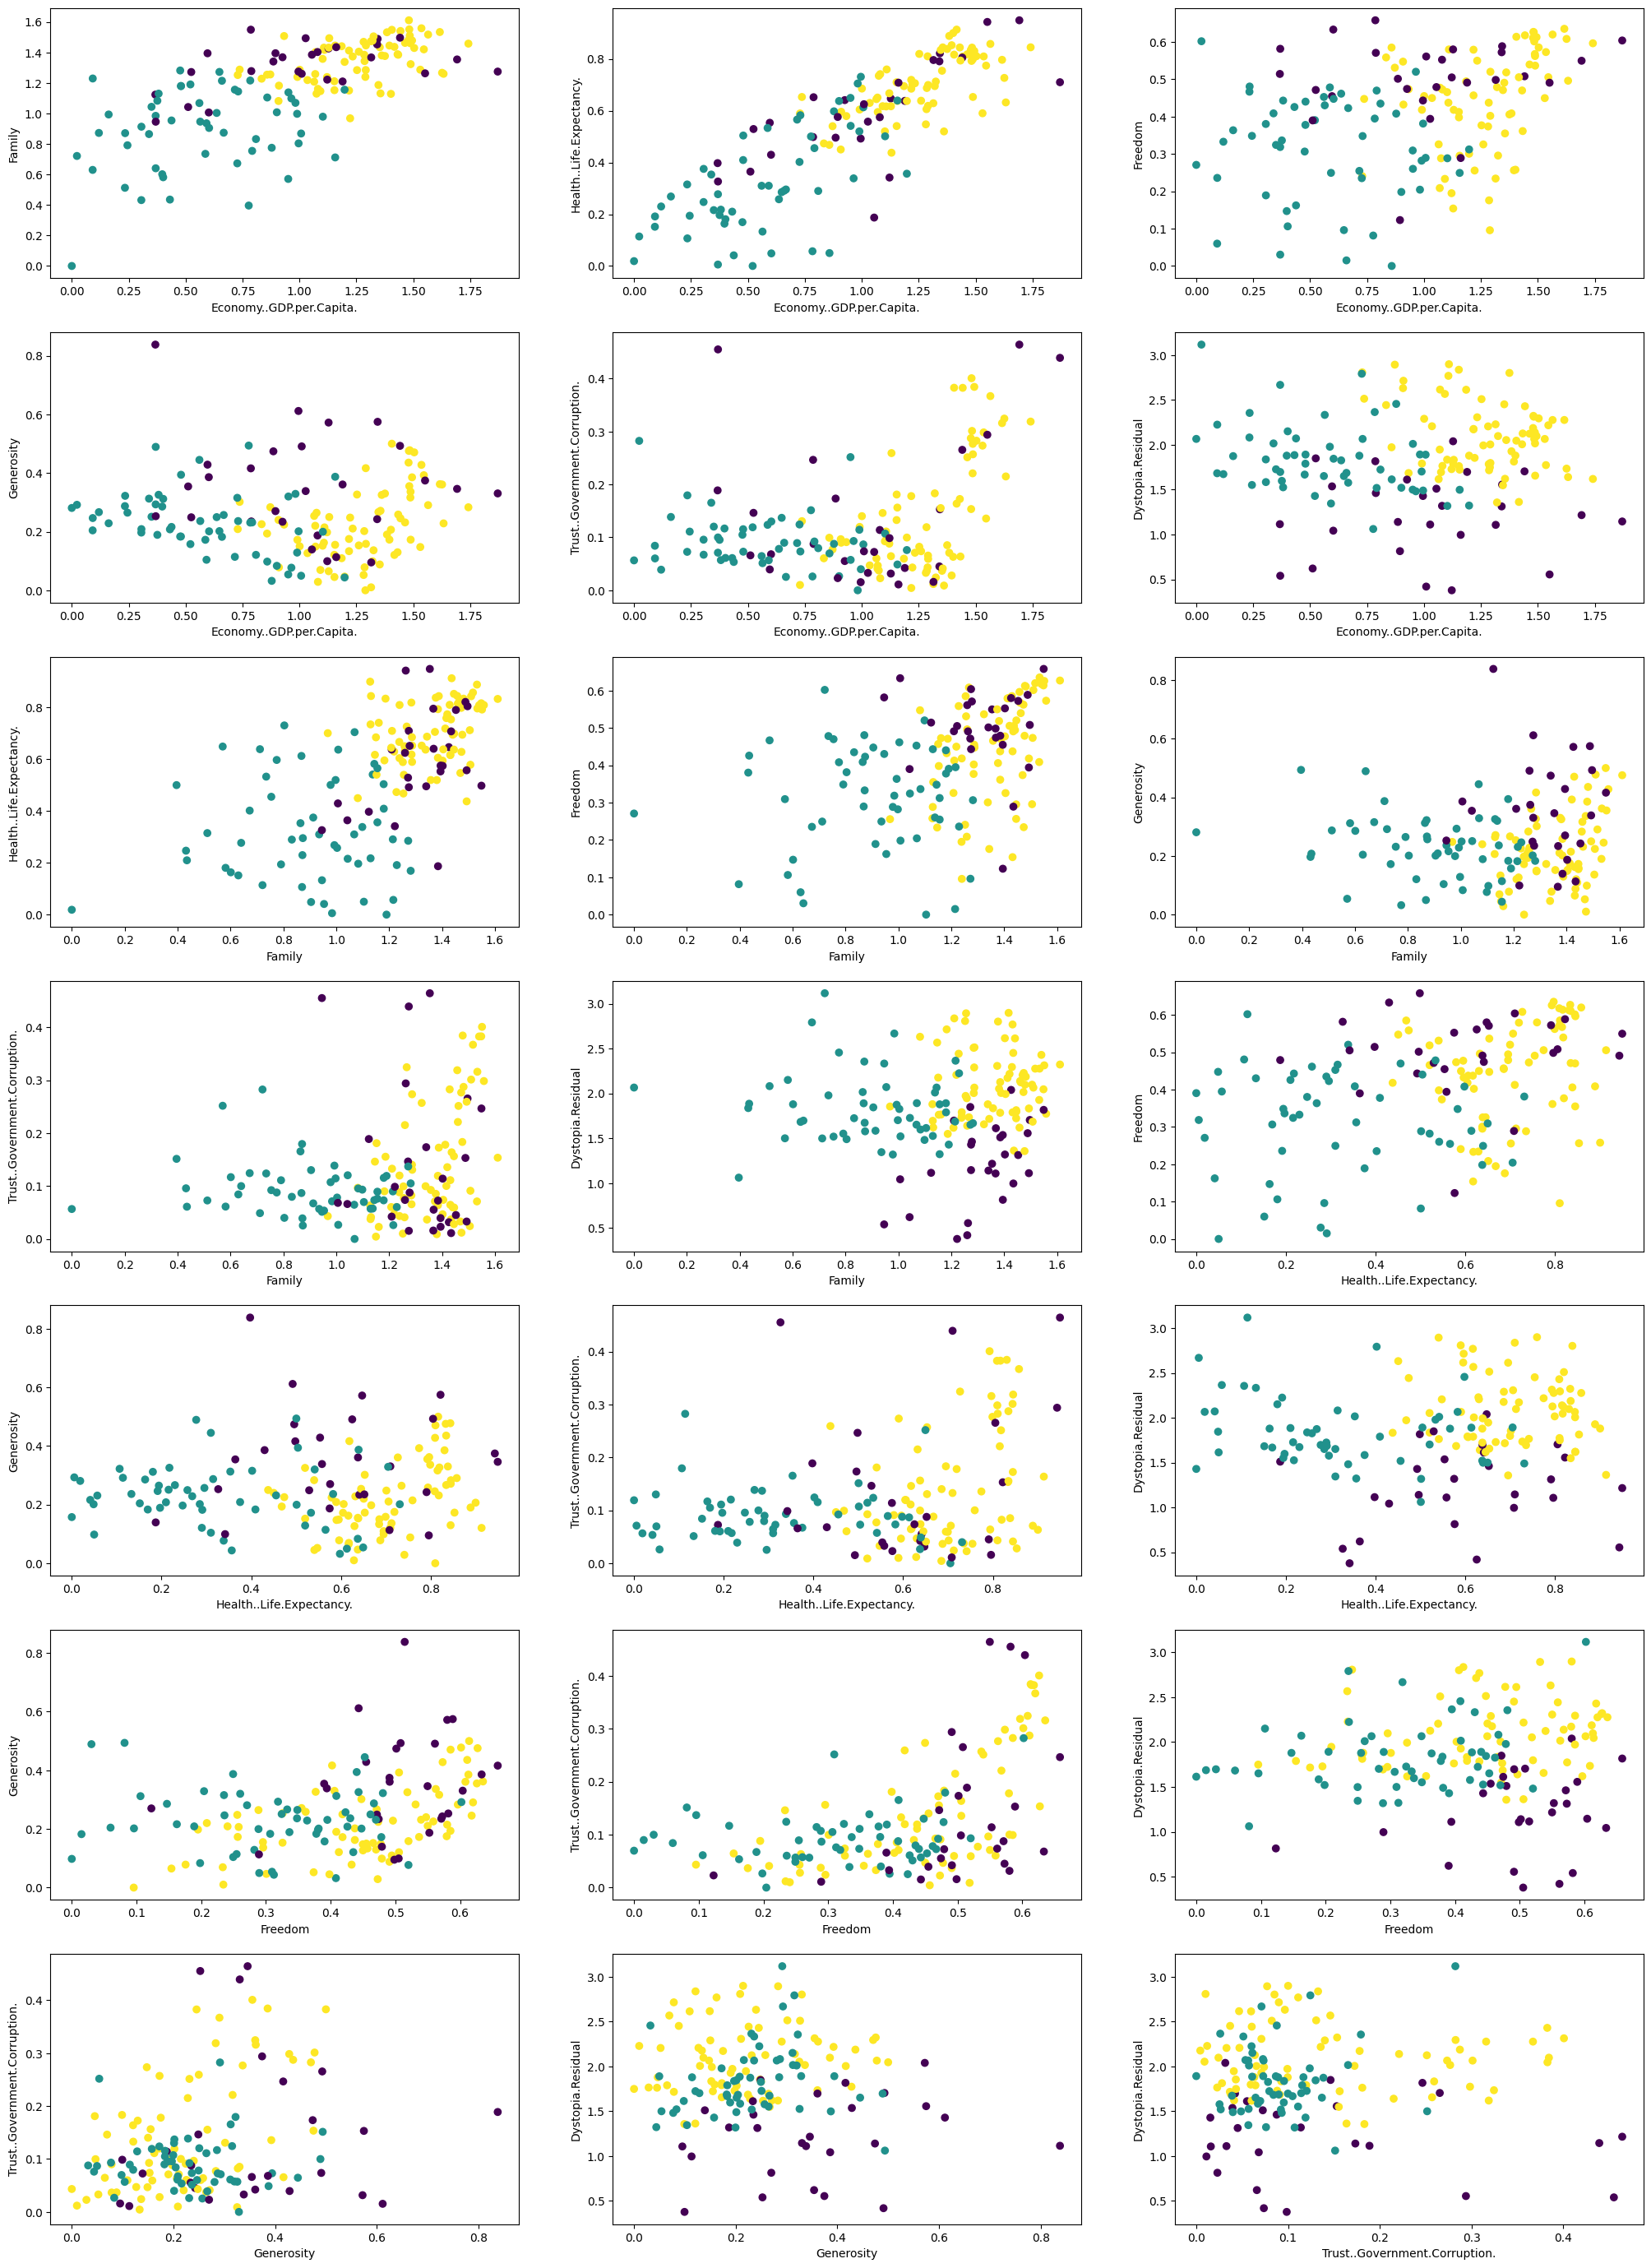

In [ ]:
socioEconomicFactorsQ1 = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']
scaledSocioEconomicFactors = StandardScaler().fit_transform(df[socioEconomicFactorsQ1])

kmeans = KMeans(n_clusters=3, random_state=0).fit(scaledSocioEconomicFactors)

def plotCluster(data, nCluster, kMeans):
    nrRows = len(data.columns) + 1 // 5
    figLength = nrRows*5

    plt.figure(figsize=(25, figLength))

    for i, (x, y) in enumerate(itertools.combinations(data.columns, 2)):
        plt.subplot(nrRows,3,i+1)
        plt.scatter(data[x], data[y], c=kMeans.labels_, cmap='viridis')
        plt.xlabel(x)
        plt.ylabel(y)

    plt.show()

plotCluster(df[socioEconomicFactorsQ1], 3, kmeans)

## Write some information about the findings above

## Natural Clusters with Generosity and Life Expectancy (10 Marks)

- ### Are there natural clusters among countries when considering their generosity, life expectancy, and GDP per capita?

For this question, we can create a smaller array with those 3 columns and do another kmeans-clustering with only them.

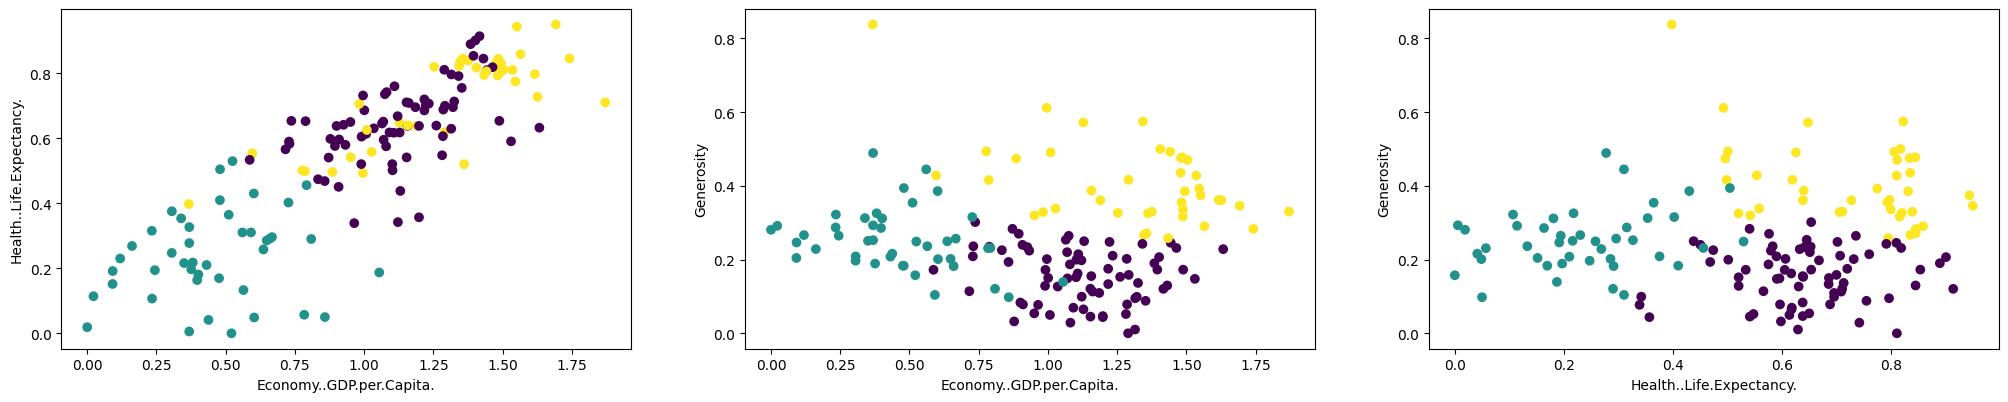

In [63]:
# Cluster countries based on generosity, life expectancy and GDP per capita
clusterArrayQ2 = ['Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 'Generosity']
scaledClusterArray = StandardScaler().fit_transform(df[clusterArrayQ2])

kmeans = KMeans(n_clusters=3, random_state=0).fit(scaledClusterArray)

plotCluster(df[clusterArrayQ2], 3, kmeans)

## Write some information about these findings

## Clusters by Economic Freedom and Trust (10 Marks)

- ### Can countries be grouped into clusters that exhibit similar economic freedom and trust in government, and how do these clusters compare in terms of happiness scores?

For this one, we use the columns:

- Freedom
- Trust..Government.Corruption.

We can then create a scatterplot of this.

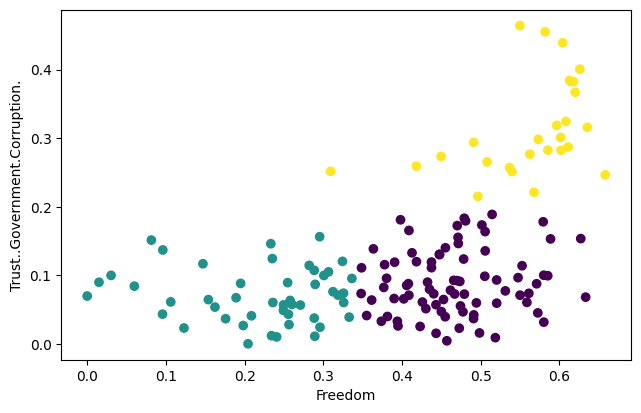

In [64]:
clusterArrayQ3 = ['Freedom', 'Trust..Government.Corruption.']
scaledClusterArray = StandardScaler().fit_transform(df[clusterArrayQ3])

kmeans = KMeans(n_clusters=3, random_state=0).fit(scaledClusterArray)

plotCluster(df[clusterArrayQ3], 3, kmeans)

Next, we can compare the scatterplot clusters based on average happiness, to see what the average happiness is for each cluster.